# Model Comparison

In [1]:
import numpy as np
import pandas as pd
import json
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tabulate import tabulate
from PIL import Image
from Model_comparison_functions import *

Set path:


In [2]:
desktop_path = os.path.expanduser("~/Desktop")
#os.chdir(desktop_path+'\DTU MSc\MSc thesis\git\lightenup')
os.chdir(desktop_path+'\Thesis')
Add_on_path = '\\Results\\f1_d5_GA\\Training d2-d11\\'
Add_on_path = "\\Results\\f1-f3_d2-d11\\"
#Add_on_path = "\\Results\\"
current_directory = os.getcwd()  # Jupyter file take the current directory as where the jupyter file is located. Different than a .py file...

In [106]:
# Choose the base setting.
# The loaded data has the following forecasts
SampleSizes = [2,4,5,7,9,11]
forecast = [1,2,6]

# Which
Forecast_examination_idx = [1] # forecast[Forecast_examination_idx] = 2
SampleSize_examination_idx = [2] # SampleSize[SampleSize_examination_idx] = 5
forecast_idx = Forecast_examination_idx[0]
SampleSize_idx = SampleSize_examination_idx[0]

In [101]:
df_Exp_Profit = json_to_df(current_directory + Add_on_path +  'Exp_profit.json')
df_RT_Profit = json_to_df(current_directory + Add_on_path + 'RT_profit.json')


In [102]:
Array = Create_Array_from_Profit(df_Exp_Profit,df_RT_Profit,NumForecasts=3, SampleSizes=SampleSizes)

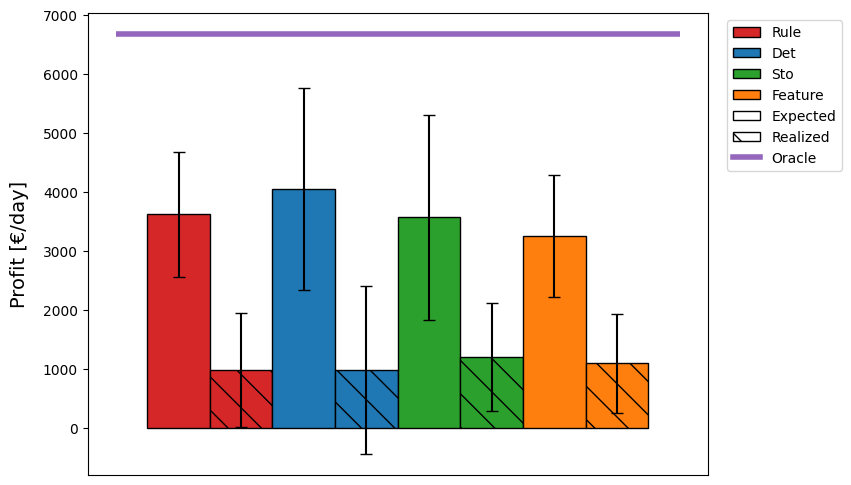

In [103]:
forecast = [1,2,3]
SampleSize = [2,4,5,7,9,11]

plot_profit_Test(Array,'', Forecast_examination_idx, SampleSize_examination_idx, barwidth = 0.1,  ShowEachTestDay = False)

In [104]:
def plot_each_test_day_Profit(data,x_axis,drawstyle):
    #x_axis = np.arange(88)
    color_models = ['C3','C0', 'C2', 'C1','C4']
    models = ['rule','det','sto','feature','oracle']
    y_axis_label = 'Realized Profit [\u20AC/day]'
    plot = data[models]

    
    fig, ax = plt.subplots(figsize=(20, 6), dpi=100)

    for m,model in enumerate(models):
        ax.plot(x_axis,data[model], 'o-',color=color_models[m],drawstyle=drawstyle,markersize=10, linewidth=1)

    ax.tick_params(axis='y', which='major', labelsize=15)
    ax.tick_params(axis='x', which='major', labelsize=15)

    ax.set_ylabel(y_axis_label, fontsize=14, labelpad=10)
    ax.set_xlabel('Test day', fontsize=14, labelpad=10)
    
    ax.legend(models, loc="upper right")
    plt.show()
    

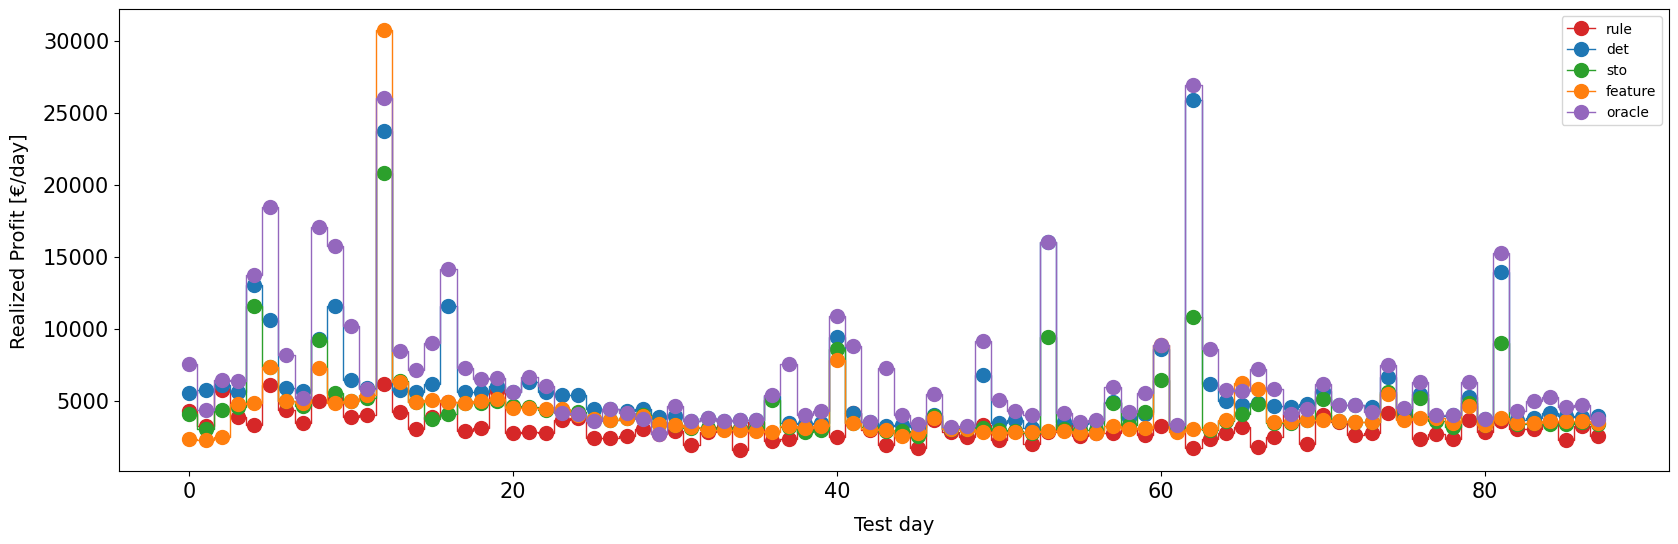

In [108]:
fixd5 = [f'f{forecast_idx}_d{SampleSize_idx}_upd{d}_t{d+1}' for d in range(0,88)]
x_axis = [upd for upd in range(0,88)]
data_RT = df_RT_Profit[fixd5].T
data_Exp = df_Exp_Profit[fixd5].T

plot_each_test_day_Profit(data_RT,x_axis,'steps-mid')

In [118]:
def Count_performance_for_each_model(Array,includeOracle = False):
    
    #  Array = np.empty((6, 1, 88, 5, 2))
    #  (number of different forecast accuracies,number of different train sizes, test days, models, result) with empty values

    # How many times does each model win?
    
    # Pick Oracle or not?
    if includeOracle == False:
        noOracle = 4
    else:
        noOracle = 5

    model_order = ['rule','det','sto','feature','oracle']
    profit_type_order = ['Expected','RT']
    Array_to_use = Array[:,:,:,0:noOracle,:]

    #print(argmax_result)
    CountArray = np.zeros((Array_to_use.shape[0],Array_to_use.shape[1],Array_to_use.shape[2],Array_to_use.shape[3],Array_to_use.shape[4]), dtype=int)  # Initialize the counts matrix
    for f in range(Array.shape[0]): # Forecast
        for sample_n in range(Array.shape[1]): # Sample length
            for profit in range(Array.shape[4]): # Expected / real profit
                for profit_type in range(2):
                    for t in range(0,88):
                        max_value = np.max(Array_to_use[f, sample_n, t, :, profit_type])
                        max_index = np.argmax(Array_to_use[f, sample_n, t, :, profit_type]) 

                        CountArray[f, sample_n, t, max_index, profit_type] = 1


    # CountArray_new has dim (f, sample_len, profit_type, model_type)
    return CountArray, model_order,profit_type_order

In [119]:
CountArray, model_order,profit_type_order = Count_performance_for_each_model(Array)
print(model_order,profit_type_order)
print(np.shape(CountArray))
print(np.shape(np.sum(CountArray, axis=2)))

['rule', 'det', 'sto', 'feature', 'oracle'] ['Expected', 'RT']
(3, 6, 88, 4, 2)
(3, 6, 4, 2)


In [124]:
# Find the indexes where 
np.where(CountArray[forecast_idx,SampleSize_idx,:,0,1]==0)

(array([ 0,  3,  4,  5,  6,  7,  9, 10, 11, 12, 13, 16, 17, 18, 19, 20, 23,
        24, 25, 26, 27, 28, 29, 30, 31, 32, 36, 38, 39, 40, 41, 42, 44, 45,
        46, 48, 49, 50, 53, 54, 55, 56, 58, 59, 60, 61, 62, 63, 64, 65, 67,
        68, 69, 71, 76, 77, 78, 79, 80, 81, 85, 86], dtype=int64),)

In [120]:
CountArray_new  = np.sum(CountArray, axis=2)

In [121]:
result_summary = [["Expected", CountArray_new[forecast_idx,SampleSize_idx,0,0],CountArray_new[forecast_idx,SampleSize_idx,1,0],CountArray_new[forecast_idx,SampleSize_idx,2,0],CountArray_new[forecast_idx,SampleSize_idx,3,0] ],
                    ["Realized", CountArray_new[forecast_idx,SampleSize_idx,0,1],CountArray_new[forecast_idx,SampleSize_idx,1,1],CountArray_new[forecast_idx,SampleSize_idx,2,1],CountArray_new[forecast_idx,SampleSize_idx,3,1]  ]]
headers = ["Rule", "Deterministic", "Stochastic", "Feature"]
table = tabulate(result_summary, headers, tablefmt="grid")
print(table)

+----------+--------+-----------------+--------------+-----------+
|          |   Rule |   Deterministic |   Stochastic |   Feature |
+==========+========+=================+==============+===========+
| Expected |     33 |              55 |            0 |         0 |
+----------+--------+-----------------+--------------+-----------+
| Realized |     26 |              25 |           31 |         6 |
+----------+--------+-----------------+--------------+-----------+


In [10]:
df_RT_Profit[fixd5].mean(axis=1)

sto        4332.822489
det        5727.348116
oracle     6675.560856
feature    4320.229372
rule       3179.584700
dtype: float64

Check on of the days:

In [59]:
f = 1
d = 5
upd = 62
t = upd+1
fixd5 = [f'f{f}_d{d}_upd{upd}_t{t}' ]
print(fixd5)
fixd5 = [f'f{f}_d{d}_upd{upd}_t{upd+1}' for upd in range(3,8)]
x_axis = [upd for upd in range(3,8)]

['f1_d5_upd62_t63']


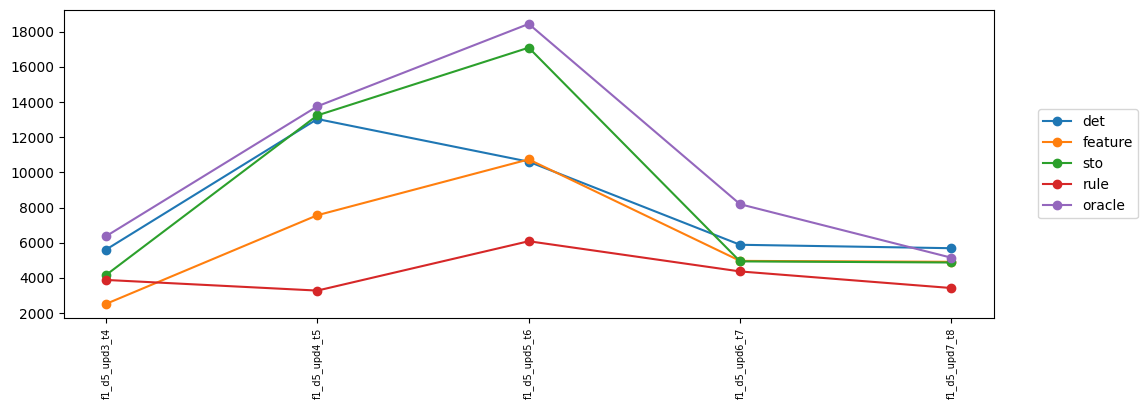

In [60]:
data = df_RT_Profit[fixd5].T
models = ['det','feature','sto','rule','oracle']
plot = data[models]
plt.figure(figsize=(12,4))
plt.plot(plot, 'o-')
plt.xticks(rotation = 90, fontsize=7)
plt.legend(models, bbox_to_anchor=(1.04, 0.5), loc="center left")
plt.show()

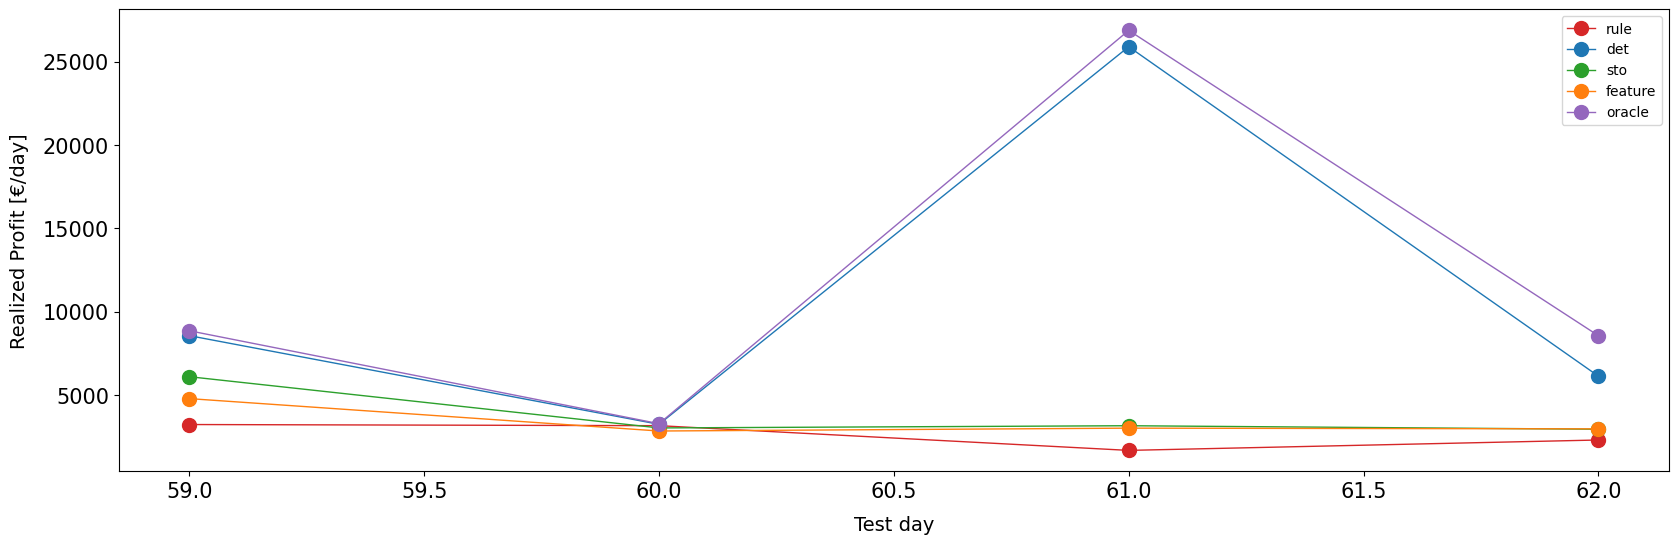

In [84]:
f = 1
d = 5
fixd5 = [f'f{f}_d{d}_upd{upd}_t{upd+1}' for upd in range(60,64)]
x_axis = [upd for upd in range(59,63)]
data_RT = df_RT_Profit[fixd5].T
plot_each_test_day_Profit(data_RT,x_axis,'default')

### Open json results and plot
Plots: 
1) Bid quantity
2) bid price used for training 
3) bid price
4) accepted bid price
5) coefficients(learning)
6) Expected and RT Profit
7) Battery dynamics

### Test case: d5 upd62 t63  
(Where deterministic model has a peak performance)

In [13]:
# Select plot parameters
choose_id = fixd5[0]
save = True #True or False
model = 'Sto' # Oracle, Rule, Det, Sto, Feature,
Profit_plot = 'all' # Rule, Det, Sto, Learn, all (for exp_and_RT Profit)
with_acceptance = True #True or False (for plot_training_price)

plt.ioff() #Repress showing plots
results = save_plots(current_directory,Add_on_path, choose_id, save, model, with_acceptance, Profit_plot);

Test case:  f1_d5_upd62_t63
+----------+----------+---------+-----------------+--------------+-----------+
|          |   Oracle |    Rule |   Deterministic |   Stochastic |   Feature |
+==========+==========+=========+=================+==============+===========+
| RT       |  26881.5 | 1678.07 |        25902.1  |      3157.92 |   3012.65 |
+----------+----------+---------+-----------------+--------------+-----------+
| Expected |  26881.5 | 2124.96 |         7588.77 |      2493.12 |   2319.46 |
+----------+----------+---------+-----------------+--------------+-----------+


In [ ]:
plot_coefficients_heatmap(results['Learn']['Bid'],save = True)
plt.show()

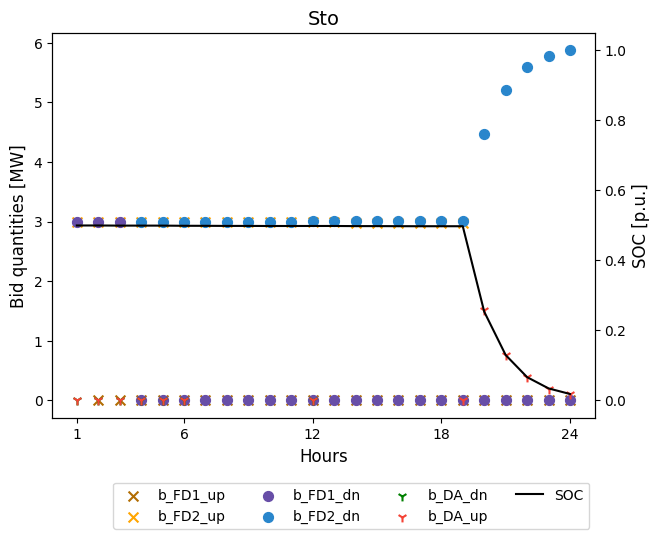

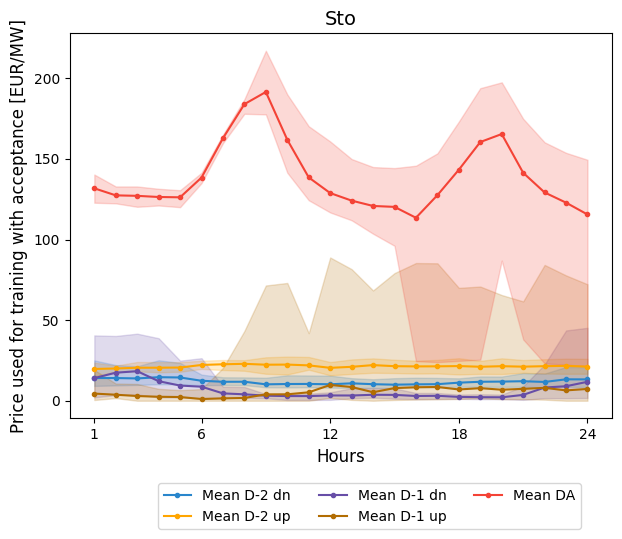

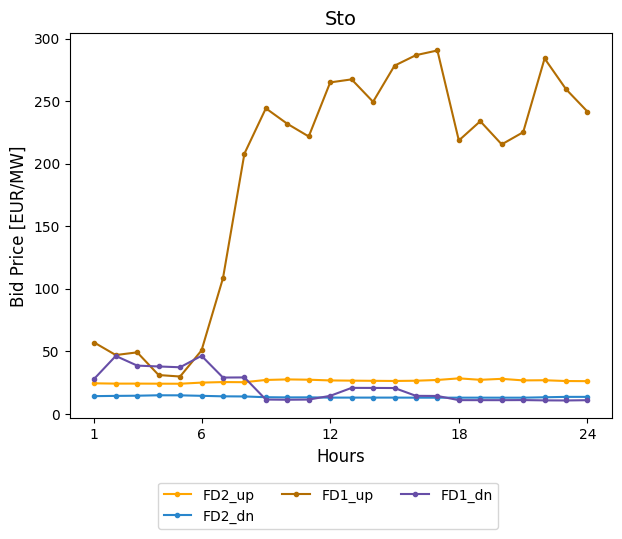

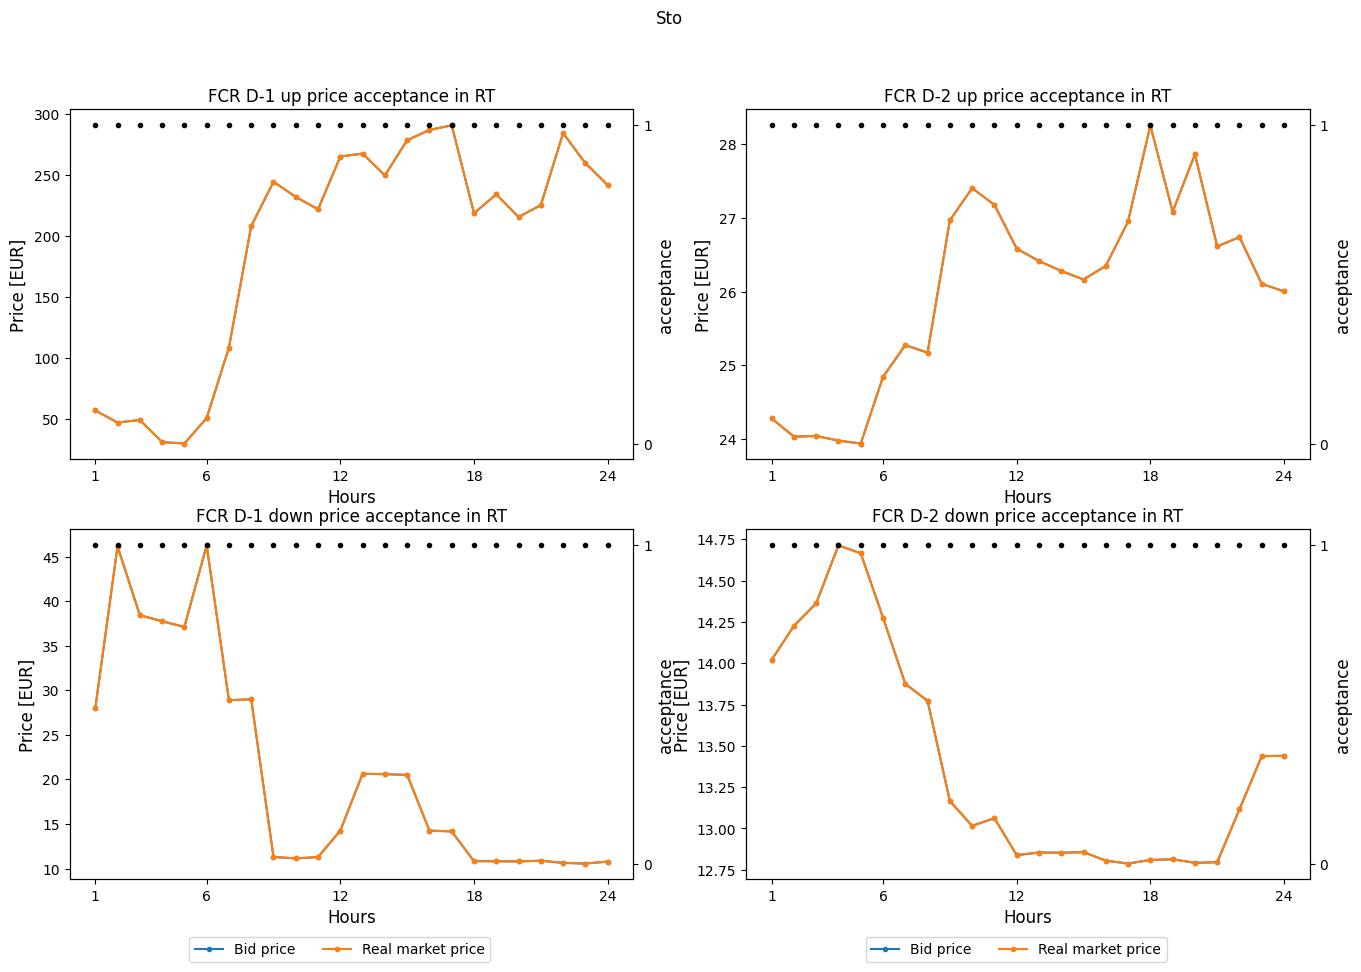

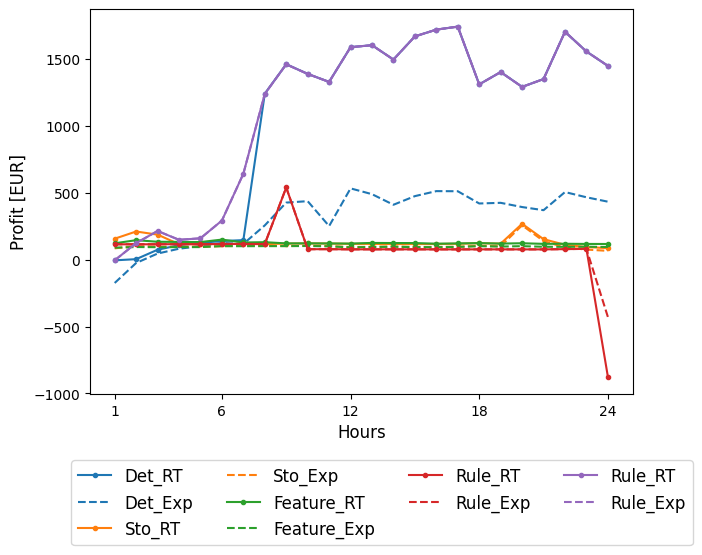

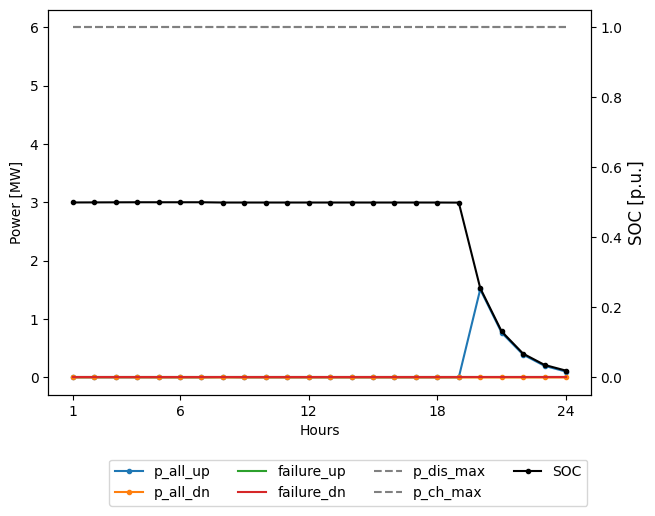

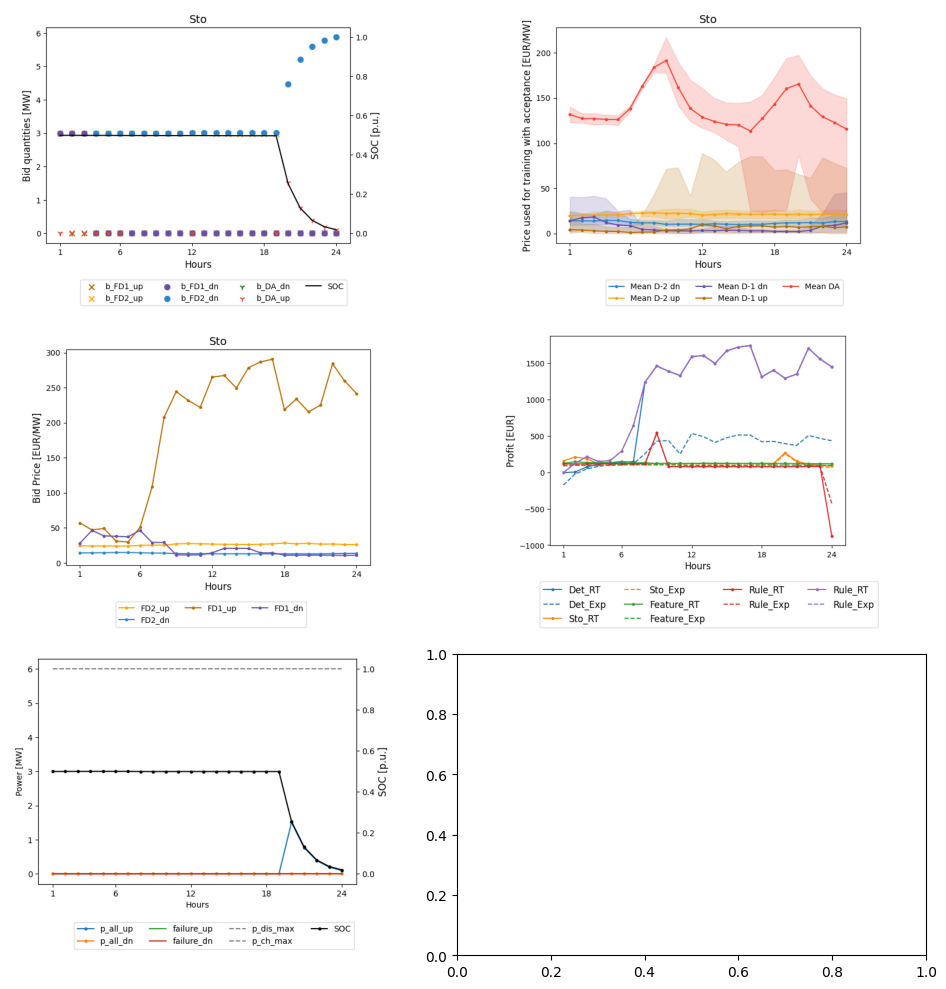

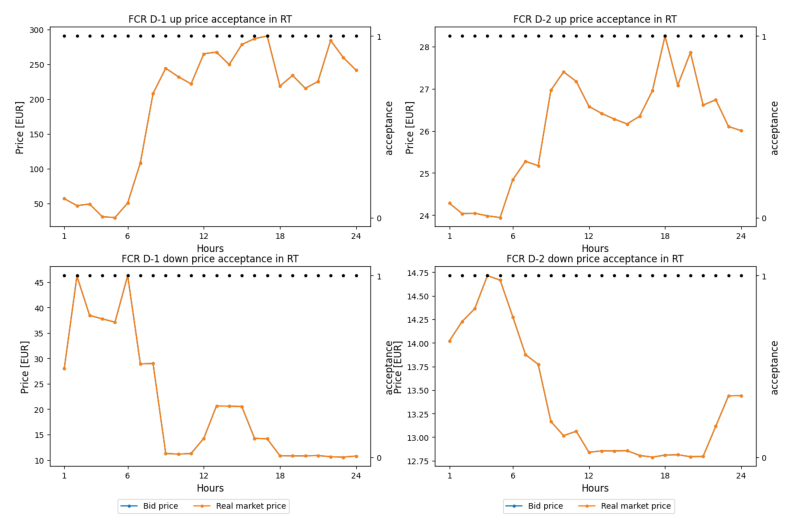

In [14]:
#View plots
view_plots(model, Profit_plot)
